In [156]:
import keras
import pandas as pd
import numpy as np
from keras.layers import *
from keras.activations import *
from keras.callbacks import *
from keras.models import *

In [180]:
data = pd.read_csv('../data/files/multiple_concatenated_tickers.csv')
data.tail()

,Index,QQQ.Open,QQQ.High,QQQ.Low,QQQ.Close,QQQ.Volume,QQQ.Adjusted,TSLA.Open,TSLA.High,TSLA.Low,...,TNX.Low,TNX.Close,TNX.Volume,TNX.Adjusted,RYSDX.Open,RYSDX.High,RYSDX.Low,RYSDX.Close,RYSDX.Volume,RYSDX.Adjusted
3095,2019-04-22,186.570007,187.990005,186.429993,187.919998,17936000,187.919998,269.000000,269.679993,262.480011,...,1.14,1.23,47944,1.23,52.619999,52.619999,52.619999,52.619999,0,52.619999
3096,2019-04-23,188.399994,190.539993,188.130005,190.309998,33665600,190.309998,260.149994,265.600006,255.750000,...,1.19,1.19,16650,1.19,52.950001,52.950001,52.950001,52.950001,0,52.950001
3097,2019-04-24,190.470001,190.710007,189.649994,189.710007,24977100,189.710007,263.850006,265.320007,258.000000,...,1.13,1.19,30603,1.19,53.509998,53.509998,53.509998,53.509998,0,53.509998
3098,2019-04-25,191.130005,191.220001,189.449997,190.479996,29517500,190.479996,255.000000,259.000000,246.070007,...,1.12,1.15,9100,1.15,53.660000,53.660000,53.660000,53.660000,0,53.660000
3099,2019-04-26,190.179993,190.690002,188.589996,190.649994,26353500,190.649994,246.500000,246.679993,231.130005,...,1.13,1.15,12270,1.15,53.490002,53.490002,53.490002,53.490002,0,53.490002


In [181]:
window_time = 5
data = (data.iloc[:,1:] - data.iloc[:,1:].rolling(window_time).min()) / (data.iloc[:,1:].rolling(window_time).max() - data.iloc[:,1:].rolling(window_time).min())
data.fillna(value=-1, inplace=True)

In [183]:
data.head(10)

,QQQ.Open,QQQ.High,QQQ.Low,QQQ.Close,QQQ.Volume,QQQ.Adjusted,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,...,TNX.Low,TNX.Close,TNX.Volume,TNX.Adjusted,RYSDX.Open,RYSDX.High,RYSDX.Low,RYSDX.Close,RYSDX.Volume,RYSDX.Adjusted
0,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000
1,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000
2,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000
3,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000
4,1.000000,1.00000,0.991073,1.000000,0.247617,1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000
5,0.929579,1.00000,1.000000,1.000000,0.450546,1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000
6,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.000000,1.000000,1.000000,1.000000,-1.0,1.000000
7,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,0.512195,0.512195,0.512195,0.512195,-1.0,0.512199
8,1.000000,1.00000,1.000000,0.975205,0.000000,0.975201,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,0.606060,0.606060,0.606060,0.606060,-1.0,0.606064
9,0.812951,0.85135,0.770993,0.420290,0.401486,0.420289,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000


In [160]:
dict([(i[1].split('.')[0], int(i[0])) for i in enumerate(list(data.columns)) if 'Open' in i[1]])

{'AAPL': 24,
 'AMD': 66,
 'AMZN': 36,
 'DATA': 60,
 'DIS': 144,
 'DUK': 156,
 'FB': 42,
 'GLD': 174,
 'HD': 150,
 'INTC': 18,
 'JNJ': 102,
 'JWN': 90,
 'KO': 108,
 'MSFT': 12,
 'NFLX': 30,
 'NVDA': 126,
 'PANW': 120,
 'PG': 96,
 'QQQ': 0,
 'RHT': 132,
 'RYSDX': 192,
 'SBUX': 72,
 'SLV': 180,
 'SPOT': 162,
 'SQ': 48,
 'TGT': 84,
 'TNX': 186,
 'TSLA': 6,
 'TWTR': 54,
 'USO': 138,
 'VRSN': 114,
 'WDC': 168,
 'WMT': 78}

In [184]:
data_mat = data.iloc[:,1:].as_matrix()

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [185]:
data_mat[:,:]

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [ 1.        ,  1.        ,  0.81012967, ...,  1.        ,
        -1.        ,  1.        ],
       [ 1.        ,  0.9404771 ,  1.        , ...,  1.        ,
        -1.        ,  1.        ],
       [ 0.83591342,  0.67080818,  1.        , ...,  0.83654054,
        -1.        ,  0.83654054]])

In [105]:
def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

In [199]:
seq_len = 5
# data = np.array(normalise_windows(data_mat))
data = np.array((data_mat))

In [200]:
data

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [ 1.        ,  1.        ,  0.81012967, ...,  1.        ,
        -1.        ,  1.        ],
       [ 1.        ,  0.9404771 ,  1.        , ...,  1.        ,
        -1.        ,  1.        ],
       [ 0.83591342,  0.67080818,  1.        , ...,  0.83654054,
        -1.        ,  0.83654054]])

In [201]:
sequence_length = seq_len + 1
result = []
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])

# if normalise_window:
#     result = normalise_windows(result)

result = np.array(result)

row = round(0.9 * result.shape[0])
train = result[:int(row), :]
np.random.shuffle(train)
x_train = train[:, :-1]
y_train = train[:, -1]
y_train = y_train[:,1] # Extract AAPL Only
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1]
y_test = y_test[:,1] # Extract AAPL Only

# x_train = np.reshape(x_train, (1, x_train.shape[0], x_train.shape[1]))
# x_test = np.reshape(x_test, (1, x_test.shape[0], x_test.shape[1]))  

[x_train, y_train, x_test, y_test]

[array([[[ 0.60563295,  0.74235819,  0.40718647, ...,  1.        ,
          -1.        ,  1.        ],
         [ 0.09154987,  0.        ,  0.        , ...,  1.        ,
          -1.        ,  1.        ],
         [ 0.        ,  0.10924449,  0.1919996 , ...,  0.92592593,
          -1.        ,  0.92592574],
         [ 0.55135195,  0.24789906,  0.6639996 , ...,  0.75324687,
          -1.        ,  0.7532462 ],
         [ 0.60135108,  0.61452591,  0.8192776 , ...,  0.5833353 ,
          -1.        ,  0.58333598]],
 
        [[ 0.        ,  0.        ,  0.        , ...,  0.2631614 ,
          -1.        ,  0.26315837],
         [ 0.        ,  0.        ,  0.46666393, ...,  1.        ,
          -1.        ,  1.        ],
         [ 0.25842247,  0.16216216,  0.03895864, ...,  1.        ,
          -1.        ,  1.        ],
         [ 0.        ,  0.32836068,  0.3013733 , ...,  0.81481381,
          -1.        ,  0.81481434],
         [ 1.        ,  1.        ,  1.        , ...,  0.4090

In [202]:
LAYERS = 250
model = Sequential()

model.add(LSTM(
    input_dim=data.shape[1],
    output_dim=LAYERS,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    LAYERS,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mae', optimizer='adam')
print('compilation time : ', time.time() - start)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 197..., units=250)`
  import sys


compilation time :  0.06766581535339355


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [203]:
MODELNAME = 'multiplemodeltest'
earlyStopping = EarlyStopping(monitor='val_loss', patience=100, verbose=0, mode='min')
mcp_save = ModelCheckpoint('./forecast/models/'+MODELNAME+'_best.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, verbose=1, epsilon=1e-4, mode='min')

/usr/local/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [204]:
VALIDATIONSIZE = 0.3
EPOCHS = 20
history = model.fit(
    x_train,
    y_train,
    batch_size=512,
    nb_epoch=EPOCHS,
    validation_split=VALIDATIONSIZE,
    callbacks = [reduce_lr_loss, earlyStopping])

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 1949 samples, validate on 836 samples
Epoch 1/20
1949/1949 [==============================] - 5s 3ms/step - loss: 0.5055 - val_loss: 0.4478
Epoch 2/20
1949/1949 [==============================] - 1s 659us/step - loss: 0.4319 - val_loss: 0.3708
Epoch 3/20
1949/1949 [==============================] - 1s 694us/step - loss: 0.3678 - val_loss: 0.3640
Epoch 4/20
1949/1949 [==============================] - 1s 736us/step - loss: 0.3568 - val_loss: 0.3608
Epoch 5/20
1949/1949 [==============================] - 1s 700us/step - loss: 0.3470 - val_loss: 0.3412
Epoch 6/20
1949/1949 [==============================] - 1s 728us/step - loss: 0.3284 - val_loss: 0.3243
Epoch 7/20
1949/1949 [==============================] - 1s 648us/step - loss: 0.3192 - val_loss: 0.3086
Epoch 8/20
1949/1949 [==============================] - 2s 782us/step - loss: 0.2985 - val_loss: 0.2916
Epoch 9/20
1949/1949 [==============================] - 1s 750us/step - loss: 0.2757 - val_loss: 0.2807
Epoch 10/20
1949/19

In [205]:
# 5 refers to days of data. 5 days worth. each 1 row has 36 features
model.predict(np.reshape(data[-5:], (5, 1, data.shape[1])))

array([[0.55293274],
       [0.6711422 ],
       [0.6481231 ],
       [0.5243847 ],
       [0.5002569 ]], dtype=float32)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


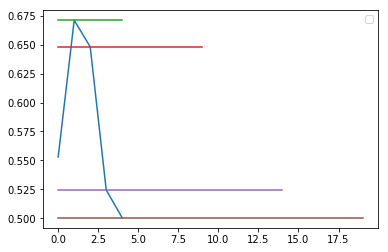

In [206]:
import matplotlib.pyplot as plt
def plot_results_multiple(predicted_data, true_data, prediction_len, suffix):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data)
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [0 for p in range(i * prediction_len)]
        plt.plot(padding + data)
        plt.legend()
    plt.show()

plot_results_multiple(model.predict(np.reshape(data[-5:], (5, 1, data.shape[1]))),
                      model.predict(np.reshape(data[-5:], (5, 1, data.shape[1]))),
                      5, 'k')

In [214]:
model.predict(x_test[-5:])

array([[0.6338901 ],
       [0.6886812 ],
       [0.83817774],
       [0.9970304 ],
       [0.95776784]], dtype=float32)